In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib as mpl
from seaborn import axes_style

In [2]:
df=pd.read_csv('10s0012.csv')
df.head()

,State,1960,1970,1980,1981,1982,1983,1984,1985,1986,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Alabama,3267,3444.354,3893.888,3919,3925,3934,3952,3973,3992,...,4430.141,4451.687,4462.832,4469.906,4486.598,4506.574,4537.299,4587.564,4626.595,4661.900
1,Alaska,226,302.583,401.851,418,450,488,514,532,544,...,624.779,627.428,633.160,642.391,650.426,660.975,668.625,676.301,681.111,686.293
2,Arizona,1302,1775.399,2718.215,2810,2890,2969,3067,3184,3308,...,5023.823,5166.810,5303.632,5449.195,5585.512,5750.475,5961.239,6178.251,6353.421,6500.180
3,Arkansas,1786,1923.322,2286.435,2293,2294,2306,2320,2327,2332,...,2651.860,2678.217,2689.601,2701.889,2717.909,2740.191,2768.918,2804.199,2830.557,2855.390
4,California,15717,19971.069,23667.902,24286,24820,25360,25844,26441,27102,...,33499.204,33998.767,34507.030,34916.495,35307.398,35629.666,35885.415,36121.296,36377.534,36756.666


#Boxplot

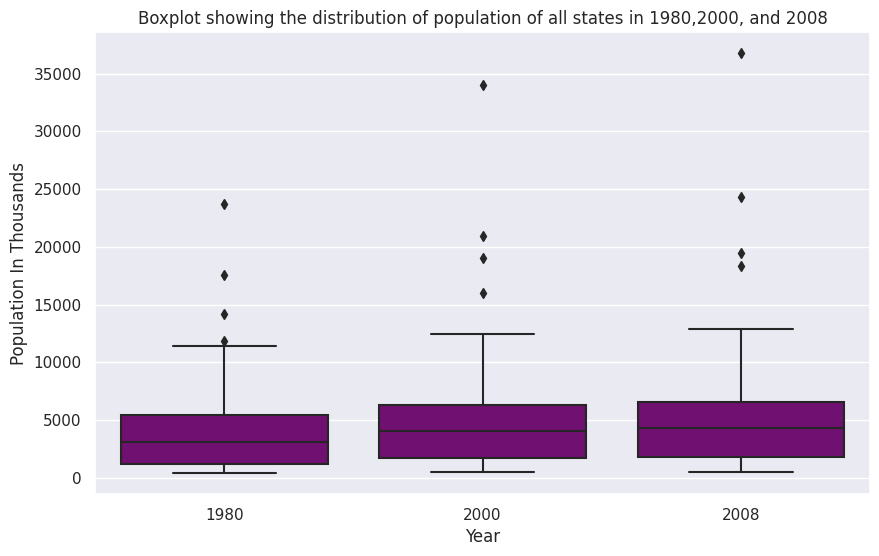

In [3]:
df_box = pd.melt(df, id_vars=['State'], var_name='Year', value_name='Population In Thousands')
years = ['1980', '2000', '2008']
df_box_filtered = df_box[df_box['Year'].isin(years)]

sns.set(rc={'figure.figsize':(10,6)})
ax = sns.boxplot(data=df_box_filtered, y='Population In Thousands', x='Year',color='purple')
ax.set(ylabel='Population In Thousands')
plt.title('Boxplot showing the distribution of population of all states in 1980,2000, and 2008')
plt.show()



#eCDF

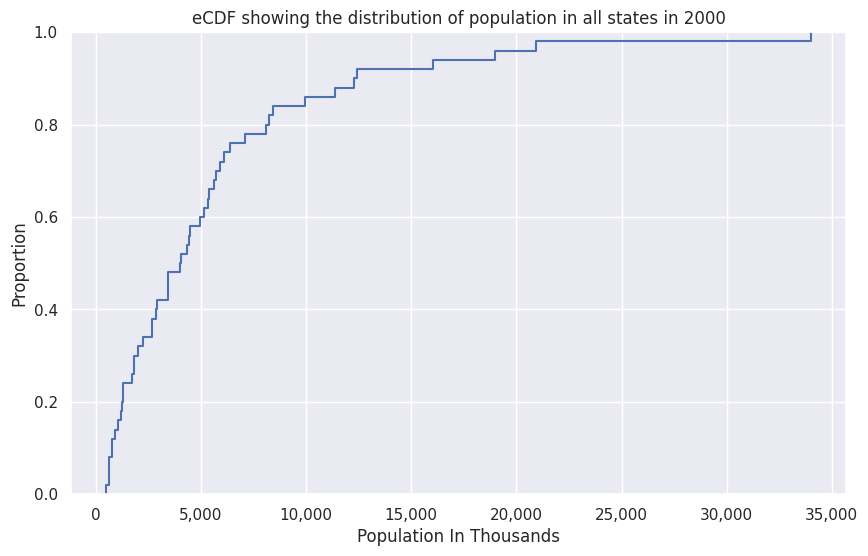

In [5]:
df_box['Year'] = pd.to_numeric(df_box['Year'], errors='coerce')

sns.set(rc={'figure.figsize':(10, 6)})
ax = sns.ecdfplot(data=df_box[df_box['Year'] == 2000], x='Population In Thousands')

ax.set(xlabel='Population In Thousands')
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('eCDF showing the distribution of population in all states in 2000')
plt.show()

#Histogram

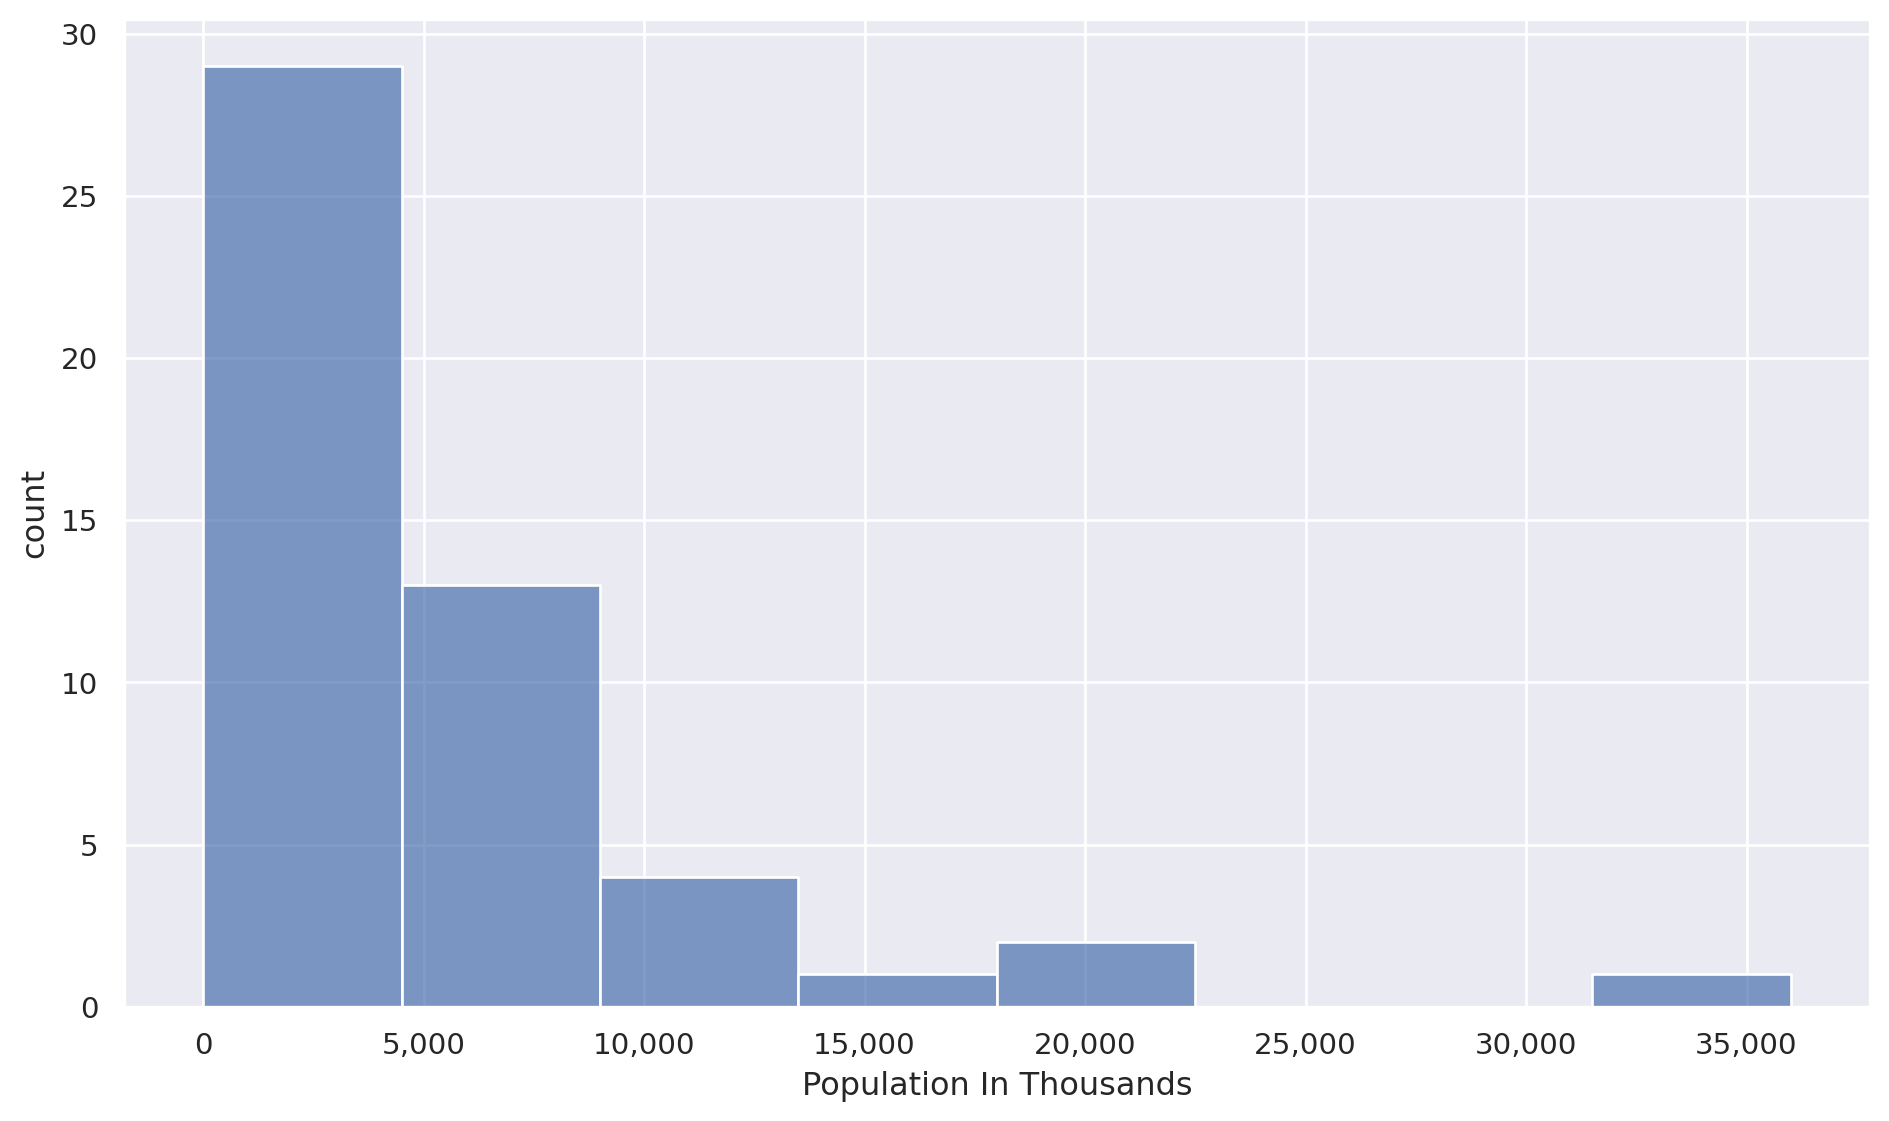

In [6]:

(so.Plot(df_box[df_box['Year'] == 2000], 'Population In Thousands')
  .add(so.Bars(), so.Hist(binwidth=4500, binrange=(0, 35000)))
  .label(y="count", x="Population In Thousands")
  .scale(x=so.Continuous().label(like="{x:,.0f}"), y=so.Continuous().label(like="{x:,.0f}"))
  .layout(size=(10, 6))
)



# Barchart for representing the population distribution by State in the year 2000

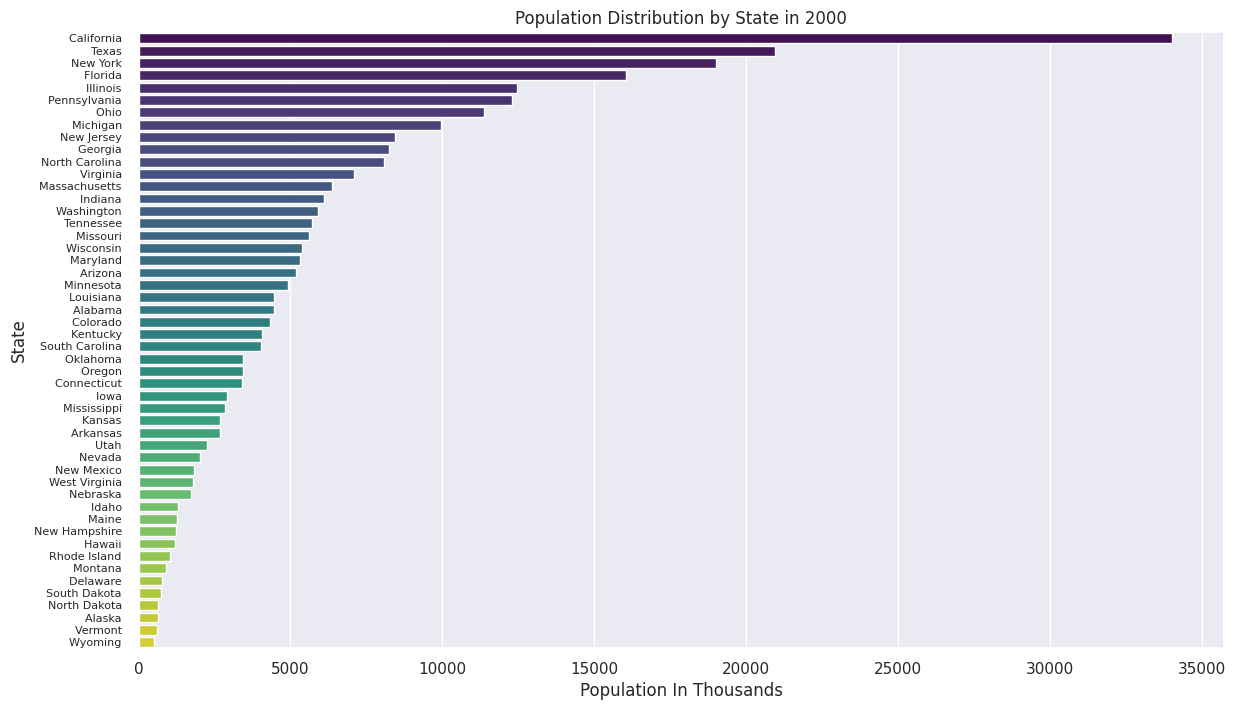

In [8]:

df_2000 = df_box[df_box['Year'] == 2000]

sorted_states = df_2000.sort_values(by='Population In Thousands', ascending=False)['State']

sns.set(rc={'figure.figsize': (14, 8)})
ax = sns.barplot(data=df_2000, x='Population In Thousands', y='State', order=sorted_states, palette='viridis')
ax.set(xlabel='Population In Thousands', ylabel='State', title='Population Distribution by State in 2000')
plt.yticks(fontsize=8)
plt.show()
